In [1]:
# Take input string from the user
input_string = input("Enter a string: ")

# Split the input string into individual words
words = input_string.split()

# Create a list to store the frequency of each word
word_frequency = []

# Count the frequency of each word
for word in words:
    word_count = words.count(word)
    word_frequency.append(word_count)

# Find the highest frequency
highest_frequency = max(word_frequency)

# Find the length of the highest-frequency word using a for loop
highest_frequency_word_length = 0
for i in range(len(words)):
    if word_frequency[i] == highest_frequency:
        word_length = len(words[i])
        if word_length > highest_frequency_word_length:
            highest_frequency_word_length = word_length

# Print the length of the highest-frequency word
print("Length of the word with the highest frequency:", highest_frequency_word_length)
            

Length of the word with the highest frequency: 5


Test Case 1:
Input: "Hello hello world world world"
word "world " has highest frequency
The length of the word "world" is 5.
Output: Length of the highest-frequency word: 5



Test Case 2:
Input: "This is a test string with multiple words"
Each word has a frequency of 1, so they all have the same frequency. 
The word "string" has the longest length among these words, which is 6.
Output: Length of the highest-frequency word: 6


Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO

In [3]:
def isValidString(s):
    freq_list = [0] * 26 

    for char in s:
        index = ord(char) - ord('a')
        freq_list[index] += 1

    freq_values = [freq for freq in freq_list if freq != 0]
    max_freq = max(freq_values)
    count = sum(freq != max_freq for freq in freq_values)

    if count <= 1:
        return "YES"
    else:
        return "NO"





In [4]:
s1 = "abc"
print(isValidString(s1))  

YES


In [5]:
s2 = "abcc"
print(isValidString(s2))  

NO


Test Case 1: s1 = "aabbc"
'a': 2 occurrences
'b': 2 occurrences
'c': 1 occurrence
If we remove one occurrence of either 'a' or 'b', the remaining characters will occur the same number of times:

'a': 1 occurrence
'b': 2 occurrences
'c': 1 occurrence
Since we can remove one character and obtain equal frequencies, the string is considered valid. The program should output "YES".

Test Case 2:
s2 = "xyyzz"

'x': 1 occurrence
'y': 2 occurrences
'z': 2 occurrences
If we remove one occurrence of either 'y' or 'z', the remaining characters will occur the same number of times:

'x': 1 occurrence
'y': 1 occurrence
'z': 2 occurrences
Again, since we can remove one character and obtain equal frequencies, the string is considered valid. The program should output "YES".

Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [3]:


pip install request

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pip


pip install pandas 

     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     --------------------------------------- 0.1/10.8 MB 825.8 kB/s eta 0:00:13
     ---------------------------------------- 0.1/10.8 MB 1.1 MB/s eta 0:00:11
      -------------------------------------- 0.1/10.8 MB 853.3 kB/s eta 0:00:13
      -------------------------------------- 0.2/10.8 MB 841.6 kB/s eta 0:00:13
      -------------------------------------- 0.3/10.8 MB 983.0 kB/s eta 0:00:11
     - -------------------------------------- 0.3/10.8 MB 1.0 MB/s eta 0:00:11
     - -------------------------------------- 0.4/10.8 MB 1.1 MB/s eta 0:00:10
     - -------------------------------------- 0.5/10.8 MB 1.1 MB/s eta 0:00:10
     -- ------------------------------------- 0.6/10.8 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.6/10.8 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/10.8 MB 1.2 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import csv
import json
import requests

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print("Failed to download data.")
        return None

def convert_to_csv(data, filename):
    if data is None:
        return

    data = json.loads(data)

    # Extracting headers from the first item in the list
    headers = list(data[0].keys())

    # Writing data to CSV file
    with open(filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()

        for row in data:
            try:
                writer.writerow(row)
            except ValueError:
                print(f"Skipping row with missing fields: {row}")

    print("CSV file created successfully.")    

    
    



Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [10]:
pip install html2text


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import requests
import html2text

# API link
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Iterate over each episode
    episodes = data.get("_embedded", {}).get("episodes", [])
    for episode in episodes:
        # Extract episode attributes
        episode_id = episode.get("id")
        episode_url = episode.get("url")
        episode_name = episode.get("name")
        season_number = episode.get("season")
        episode_number = episode.get("number")
        episode_type = episode.get("type")
        airdate = episode.get("airdate")
        airtime = episode.get("airtime")
        runtime = episode.get("runtime")
        average_rating = episode.get("rating", {}).get("average")
        summary = episode.get("summary", "")
        medium_image = episode.get("image", {}).get("medium")
        original_image = episode.get("image", {}).get("original")

        # Format the attributes
        formatted_summary = html2text.html2text(summary).strip()  # Convert HTML tags to plain text

        # Print the formatted data
        print("Episode ID:", episode_id)
        print("Episode URL:", episode_url)
        print("Episode Name:", episode_name)
        print("Season Number:", season_number)
        print("Episode Number:", episode_number)
        print("Episode Type:", episode_type)
        print("Airdate:", airdate)
        print("Airtime:", airtime)
        print("Runtime:", runtime)
        print("Average Rating:", average_rating)
        print("Summary:", formatted_summary)
        print("Medium Image Link:", medium_image)
        print("Original Image Link:", original_image)
        print("-------------------")
else:
    print("Error occurred while fetching data. Status code:", response.status_code)












Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Episode Name: The Original
Season Number: 1
Episode Number: 1
Episode Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that
she's actually an android, programmed to entertain rich guests seeking to act
out their fantasies in an idealized vision of the 1880s. However, the people
in charge soon realize that their androids are acting in ways that they didn't
anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
-------------------
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Episode Name: Chestnut
Season Number: 1
Episode Number: 2
Episode Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtim

In [13]:
pip install matplotlib



  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.4 MB 762.6 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.4 MB 817.0 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.4 MB 784.3 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.4 MB 835.2 kB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.4 MB 842.9 kB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.4 MB 873.8 kB/s eta 0:00:02
     ----------- ---------------------------- 0.4/1.4 MB 946.4 kB/s eta 0:00:02
     ------------- -------------------------- 0.5/1.4 MB 1.0 MB/s eta 0:00:01
     -------


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# API link
api_url = "https://data.nasa.gov/resource/y77d-th95.json"


In [17]:
df = pd.read_json(api_url)

# Convert the year field to datetime format with errors='coerce'
df['year'] = pd.to_datetime(df['year'], errors='coerce')



In [18]:
print(df['year'])

0     1880-01-01
1     1951-01-01
2     1952-01-01
3     1976-01-01
4     1902-01-01
         ...    
995   1934-01-01
996   2011-01-01
997   1869-01-01
998   1922-01-01
999   1905-01-01
Name: year, Length: 1000, dtype: datetime64[ns]


In [19]:
# Question 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['year'] < '2000')]

In [21]:
# Question 2: Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['year'] < '1970')]


In [28]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation', ':@computed_region_cbhk_fwbd',
       ':@computed_region_nnqa_25f4'],
      dtype='object')

In [29]:
# Question 3: Get all Earth meteorites with a mass greater than 10,000 kg
earth_meteorites_mass_gt_10000kg = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['mass'] > 10000)]

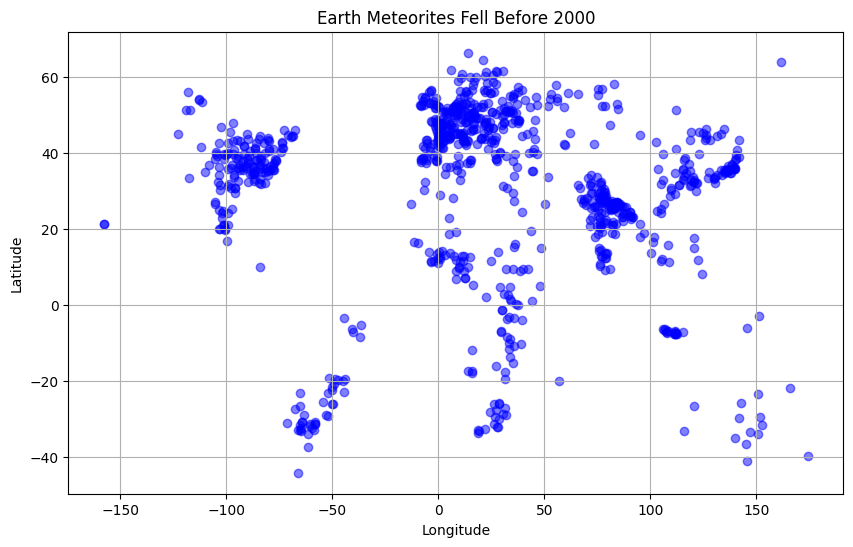

In [30]:
# Plot 1: Earth meteorites that fell before 2000
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'], color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 2000')
plt.grid(True)
plt.show()

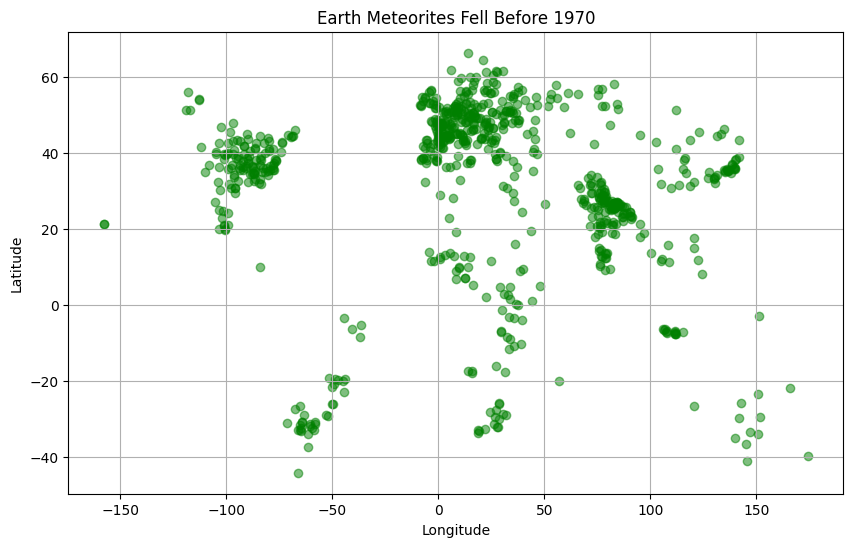

In [31]:
# Plot 2: Earth meteorites' coordinates that fell before 1970
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 1970')
plt.grid(True)
plt.show()

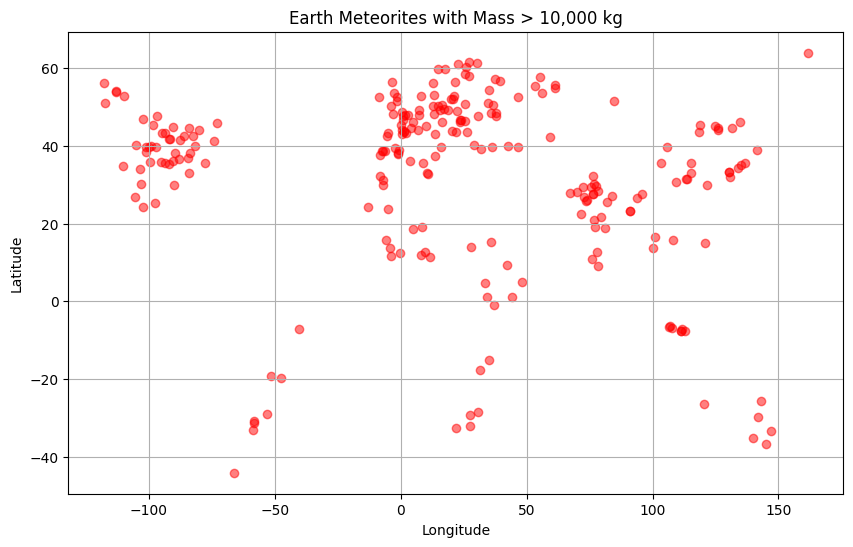

In [32]:
# Plot 3: Earth meteorites with a mass greater than 10,000 kg
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_mass_gt_10000kg['reclong'], earth_meteorites_mass_gt_10000kg['reclat'], color='red', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites with Mass > 10,000 kg')
plt.grid(True)
plt.show()


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

In [1]:
import requests
# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extracting show information
    show_name = data["name"]
    show_language = data["language"]
    show_genre = data["genres"]
    show_summary =data["summary"]

    # Printing show information
    print("Show Name:", show_name)
    print("Language:", show_language)
    print("Genre:", ", ".join(show_genre))
    print("Summary:", show_summary)
    print()

    # Extracting episode information
    episodes = data["_embedded"]["episodes"]

    print("Episode Information:")
    print("---------------------")

    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_name = episode["name"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = episode["summary"]
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        # Printing episode information
        print("ID:", episode_id)
        print("URL:", episode_url)
        print("Name:", episode_name)
        print("Season:", episode_season)
        print("Number:", episode_number)
        print("Type:", episode_type)
        print("Airdate:", episode_airdate)
        print("Airtime:", episode_airtime)
        print("Runtime:", episode_runtime)
        print("Average Rating:", episode_rating)
        print("Summary:", episode_summary)
        print("Medium Image Link:", episode_image_medium)
        print("Original Image Link:", episode_image_original)
        print()
else:
    print("Failed to retrieve data from the API.")







Show Name: Westworld
Language: English
Genre: Drama, Science-Fiction, Western
Summary: <p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.</p>

Episode Information:
---------------------
ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>
Medium Image Link: https://static.tvmaze.com/upload

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format

In [4]:
import requests

# API link
api_link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Send GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Get all Pokemons whose spawn rate is less than 5%
    print("Pokemons with spawn rate less than 5%:")
    less_than_5_spawn_rate = [pokemon["name"] for pokemon in data["pokemon"] if pokemon.get("spawn_chance", 0) < 5]
    for pokemon in less_than_5_spawn_rate:
        print(pokemon)
    print()

    # Get all Pokemons that have less than 4 weaknesses
    print("Pokemons with less than 4 weaknesses:")
    less_than_4_weaknesses = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("weaknesses", [])) < 4]
    for pokemon in less_than_4_weaknesses:
        print(pokemon)
    print()

    # Get all Pokemons that have no multipliers at all
    print("Pokemons with no multipliers:")
    no_multipliers = [pokemon["name"] for pokemon in data["pokemon"] if not pokemon.get("multipliers")]
    for pokemon in no_multipliers:
        print(pokemon)
    print()

    # Get all Pokemons that do not have more than 2 evolutions
    print("Pokemons with no more than 2 evolutions:")
    less_than_2_evolutions = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("next_evolution", [])) <= 2]
    for pokemon in less_than_2_evolutions:
        print(pokemon)
    print()

    # Get all Pokemons whose spawn time is less than 300 seconds
    print("Pokemons with spawn time less than 300 seconds:")
    less_than_300_spawn_time = [pokemon["name"] for pokemon in data["pokemon"] if pokemon.get("spawn_time") != "N/A" and int(pokemon.get("spawn_time", "0:00").split(":")[0]) * 60 + int(pokemon.get("spawn_time", "0:00").split(":")[1]) < 300]
    for pokemon in less_than_300_spawn_time:
        print(pokemon)
    print()

    # Get all Pokemon who have more than two types of capabilities
    print("Pokemons with more than two types of capabilities:")
    more_than_2_types = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("type", [])) > 2]
    for pokemon in more_than_2_types:
        print(pokemon)
    print()

else:
    print("Failed to retrieve data from the API.")


Pokemons with spawn rate less than 5%:
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Kakuna
Beedrill
Pidgeotto
Pidgeot
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan


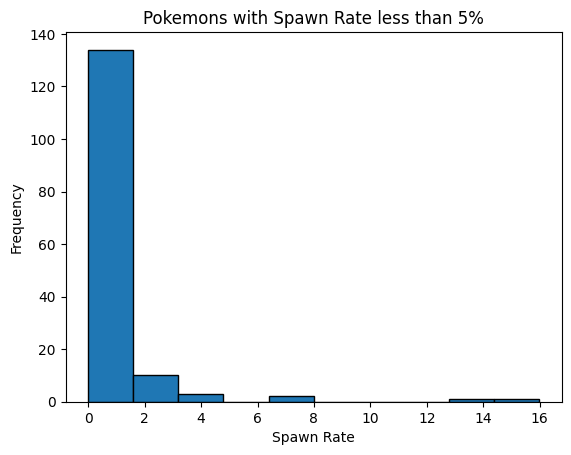

In [7]:
import matplotlib.pyplot as plt


# Get all Pokemons whose spawn rate is less than 5%
spawn_rates = [pokemon["spawn_chance"] for pokemon in data["pokemon"] if pokemon.get("spawn_chance") is not None]
plt.hist(spawn_rates, bins=10, edgecolor='black')
plt.xlabel("Spawn Rate")
plt.ylabel("Frequency")
plt.title("Pokemons with Spawn Rate less than 5%")
plt.show()

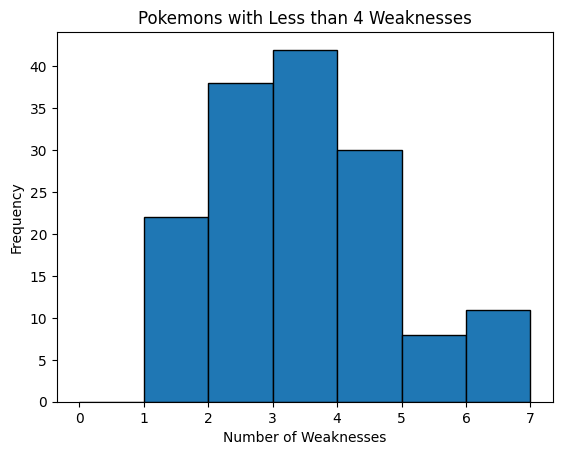

In [9]:
# Get all Pokemons that have less than 4 weaknesses
num_weaknesses = [len(pokemon.get("weaknesses", [])) for pokemon in data["pokemon"]]
plt.hist(num_weaknesses, bins=range(8), edgecolor='black')
plt.xlabel("Number of Weaknesses")
plt.ylabel("Frequency")
plt.title("Pokemons with Less than 4 Weaknesses")
plt.show()

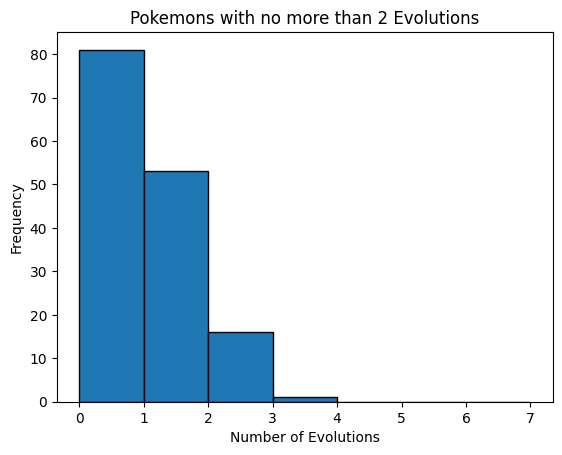

In [10]:
# Get all Pokemons that do not have more than 2 evolutions
num_evolutions = [len(pokemon.get("next_evolution", [])) for pokemon in data["pokemon"]]
plt.hist(num_evolutions, bins=range(8), edgecolor='black')
plt.xlabel("Number of Evolutions")
plt.ylabel("Frequency")
plt.title("Pokemons with no more than 2 Evolutions")
plt.show()


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

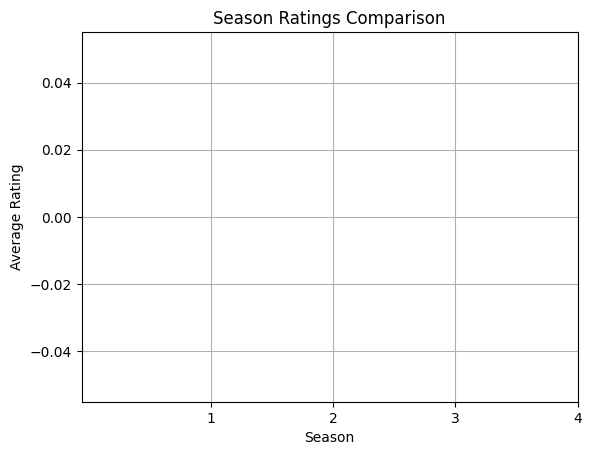

In [57]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(api_url)
data = response.json()

# Extract the episodes data
episodes_data = data["_embedded"]["episodes"]

# Create a DataFrame from the episodes data
df = pd.DataFrame(episodes_data)

# Convert 'rating' column to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert 'season' column to numeric type for proper sorting
df['season'] = pd.to_numeric(df['season'])

# Calculate average rating for each season
season_ratings = df.groupby('season')['rating'].mean()

# Create a line plot to compare the ratings for all seasons
season_ratings.plot(kind='line', marker='o', xlabel='Season', ylabel='Average Rating', title='Season Ratings Comparison')
plt.xticks(season_ratings.index)
plt.grid(True)
plt.show()



In [59]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
episode_ratings = df.groupby(['season', 'name'])['rating'].mean().reset_index()


In [81]:
high_rated_episodes = episode_ratings.groupby('season').filter(lambda x: x['rating'].mean() > 8)


In [68]:
import seaborn as sns

In [82]:




# Check if the DataFrame is empty
if high_rated_episodes.empty:
    print("No episodes found with average rating > 8 for every season")
else:
    # Plot the episode names
    sns.barplot(data=high_rated_episodes, x='season', y='name')
    plt.xlabel('Season')
    plt.ylabel('Episode Name')
    plt.title('Episodes with Average Rating > 8')
    plt.xticks(rotation=90)
    plt.show()

No episodes found with average rating > 8 for every season


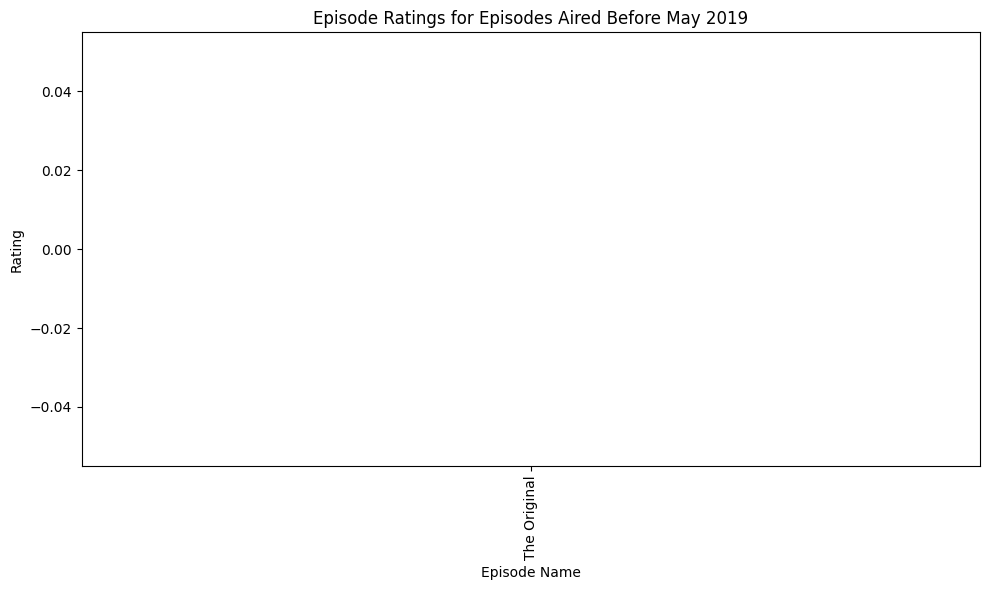

In [83]:
# Convert 'airdate' column to datetime type
df['airdate'] = pd.to_datetime(df['airdate'], errors='coerce')

# Filter episodes aired before May 2019
filtered_episodes = df[df['airdate'] < pd.Timestamp('2019-05-01')]

# Get the episode names
episode_names = filtered_episodes['name']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(episode_names, filtered_episodes['rating'])
plt.xlabel('Episode Name')
plt.ylabel('Rating')
plt.title('Episode Ratings for Episodes Aired Before May 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    







In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(api_url)
data = response.json()

# Extract the episodes data
episodes_data = data["_embedded"]["episodes"]

# Create a DataFrame from the episodes data
df = pd.DataFrame(episodes_data)

# Convert 'rating' column to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert 'season' column to numeric type for proper sorting
df['season'] = pd.to_numeric(df['season'])


In [12]:
episode_names = []
for episode in episodes_data:
    episode_names.append(episode["name"])


In [13]:
for name in episode_names:
    print(name)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger
Parce Domine
The Winter Line
The Absence of Field
The Mother of Exiles
Genre
Decoherence
Passed Pawn
Crisis Theory
The Auguries
Well Enough Alone
Années Folles
Generation Loss
Zhuangzi
Fidelity
Metanoia
Que Será, Será


In [22]:
df.dropna(subset=['rating'], inplace=True)
df.fillna(value={'season': 0}, inplace=True)


In [24]:
print(df)

Empty DataFrame
Columns: [id, url, name, season, number, type, airdate, airtime, airstamp, runtime, rating, image, summary, _links]
Index: []


In [17]:
highest_rating_episode = df.groupby('season')['rating'].idxmax().dropna()
lowest_rating_episode = df.groupby('season')['rating'].idxmin().dropna()

In [18]:
highest_rating_names = df.loc[highest_rating_episode, 'name']
lowest_rating_names = df.loc[lowest_rating_episode, 'name']


In [21]:
print(highest_rating_episode)

Series([], Name: rating, dtype: float64)


In [32]:

import requests
import pandas as pd

# Fetch data from the API
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(api_url)
data = response.json()

if "_embedded" in data and "episodes" in data["_embedded"]:
        episodes_data = data["_embedded"]["episodes"]

        df = pd.DataFrame(episodes_data)
        print(df.head())

        



       id                                                url   
0  869671  https://www.tvmaze.com/episodes/869671/westwor...  \
1  911201  https://www.tvmaze.com/episodes/911201/westwor...   
2  911204  https://www.tvmaze.com/episodes/911204/westwor...   
3  911205  https://www.tvmaze.com/episodes/911205/westwor...   
4  927174  https://www.tvmaze.com/episodes/927174/westwor...   

                name  season  number     type     airdate airtime   
0       The Original       1       1  regular  2016-10-02   21:00  \
1           Chestnut       1       2  regular  2016-10-09   21:00   
2          The Stray       1       3  regular  2016-10-16   21:00   
3  Dissonance Theory       1       4  regular  2016-10-23   21:00   
4        Contrapasso       1       5  regular  2016-10-30   21:00   

                    airstamp  runtime            rating   
0  2016-10-03T01:00:00+00:00       68    {'average': 8}  \
1  2016-10-10T01:00:00+00:00       60  {'average': 7.7}   
2  2016-10-17T01:00:00+

In [50]:
df['rating'] = pd.to_numeric(df['rating'])

df['season'] = pd.to_numeric(df['season'])

highest_rating_episode = df.groupby('season')['rating'].idxmax().dropna()
highest_rating_episode = df.groupby('season')['rating'].idxmin().dropna()


In [51]:
highest_rating_episode

Series([], Name: rating, dtype: float64)

In [48]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['rating'].idxmax().dropna()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin().dropna()

highest_rated_episodes_info = df.loc[highest_rated_episodes, ['season', 'rating']]
lowest_rated_episodes_info = df.loc[lowest_rated_episodes, ['season',  'rating']]

print("Episodes with the highest rating in each season:")
print(highest_rated_episodes_info)

print("Episodes with the lowest rating in each season:")
print(lowest_rated_episodes_info)

Episodes with the highest rating in each season:
Empty DataFrame
Columns: [season, rating]
Index: []
Episodes with the lowest rating in each season:
Empty DataFrame
Columns: [season, rating]
Index: []


In [3]:
import pandas as pd 
import numpy as np 
import requests 
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Assignment_Ruchita_Bhosale\Electric_Vehicle_Population_Data.csv')

In [4]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [5]:
df.shape

(130443, 17)

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [10]:
df.duplicated().sum()


0

In [12]:
#segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print('numerical_columns :', numerical_columns)
print('categorical_columns:', categorical_columns)




numerical_columns : Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')
categorical_columns: Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


In [27]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [29]:
df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [30]:

non_clean_cars = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "No"]
non_clean_cars_info = non_clean_cars[["Make", "Model"]]
print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_info)








Cars and Types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []


In [31]:
df["CAFV Eligible"] = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Yes"


In [32]:
non_clean_cars = df[df["CAFV Eligible"] == False]


In [33]:
print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars[["Make", "Model"]])

Cars and Types that do not qualify for clean alternative fuel vehicle:
          Make    Model
0        TESLA  MODEL X
1        HONDA  CLARITY
2        TESLA  MODEL 3
3       NISSAN     LEAF
4        TESLA  MODEL S
...        ...      ...
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130441   TESLA  MODEL X
130442   TESLA  MODEL 3

[130443 rows x 2 columns]


In [36]:

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars = [car for car in data if car[0] == "Tesla"]
bothell_tesla_cars = [car for car in tesla_cars if car[3] == "Bothell"]
print(bothell_tesla_cars)

[]


In [38]:
data["Located in Bothell"] = data["Vehicle Location"] == "Bothell"


In [40]:
bothell_tesla_cars = data[data["Located in Bothell"] == True]


In [41]:
print("Tesla cars located in Bothell:")
print(bothell_tesla_cars[["Make", "Model"]])


Tesla cars located in Bothell:
Empty DataFrame
Columns: [Make, Model]
Index: []
